In [101]:
import matplotlib.pyplot as plt
import numpy as np

def is_float(number):
    try:
        num = float(number)
        return True
    except ValueError:
        return False


def training_plot(log_path: str, loss_offset=20):
    with open(log_path, 'r') as f:
        lines = f.readlines()

    x = []
    y = []
    checkpoint = []
    AP = [[] for _ in range(6)]
    for line in lines:
        line = line.split()

        if len(line) == 8 and line[5] == 'checkpoint':
            checkpoint.append(int(line[-1][-11:-4]))

        if len(line) == 13 and line[0] == '|' and is_float(line[1]):
            AP[0].append(float(line[1]))
            AP[1].append(float(line[3]))
            AP[2].append(float(line[5]))
            AP[3].append(float(line[7]))
            AP[4].append(float(line[9]))
            AP[5].append(float(line[11]))

        if len(line) > 9 and line[6] == 'iter:':
            x.append(int(line[7]))
            y.append(float(line[9]))

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    ax1.plot(x[loss_offset:], y[loss_offset:])
    ax1.set_yscale('log')
    ax1.title.set_text("Training Loss")
    ax1.set_xlabel('iter')
    ax1.set_ylabel('loss')

    ax2.plot(checkpoint, AP[0], label='AP')
    ax2.plot(checkpoint, AP[1], label='AP50')
    ax2.plot(checkpoint, AP[2], label='AP75')
    ax2.plot(checkpoint, AP[3], label='APs')
    ax2.plot(checkpoint, AP[4], label='APm')
    ax2.plot(checkpoint, AP[5], label='APl')
    ax2.legend()
    ax2.title.set_text("Training AP")
    ax2.set_xlabel('iter')
    ax2.set_ylabel('AP')

    fig.suptitle(log_path[2:-4], fontsize="x-large")
    return np.array(x), np.array(y), np.array(checkpoint), np.array(AP)

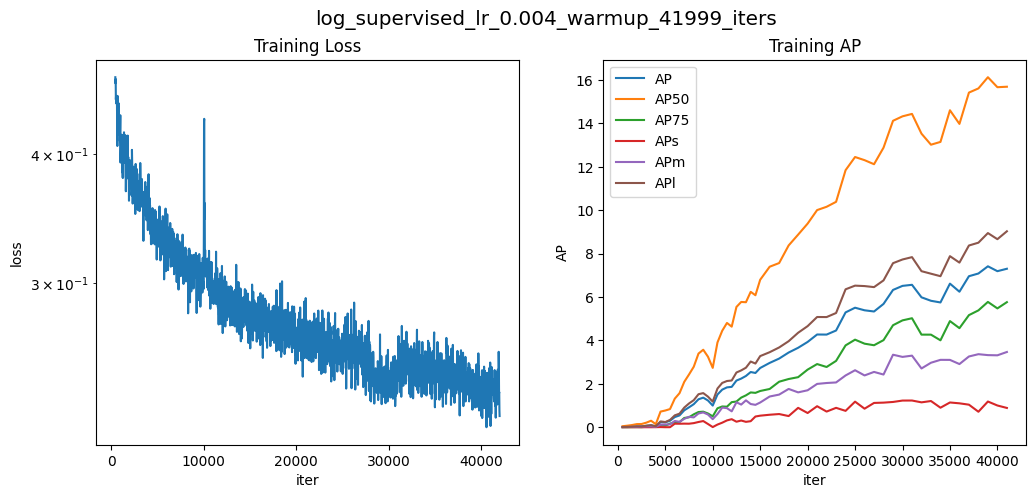

In [102]:
x1, y1, checkpoint1, AP1 = training_plot('./log_supervised_lr_0.004_warmup_41999_iters.txt')

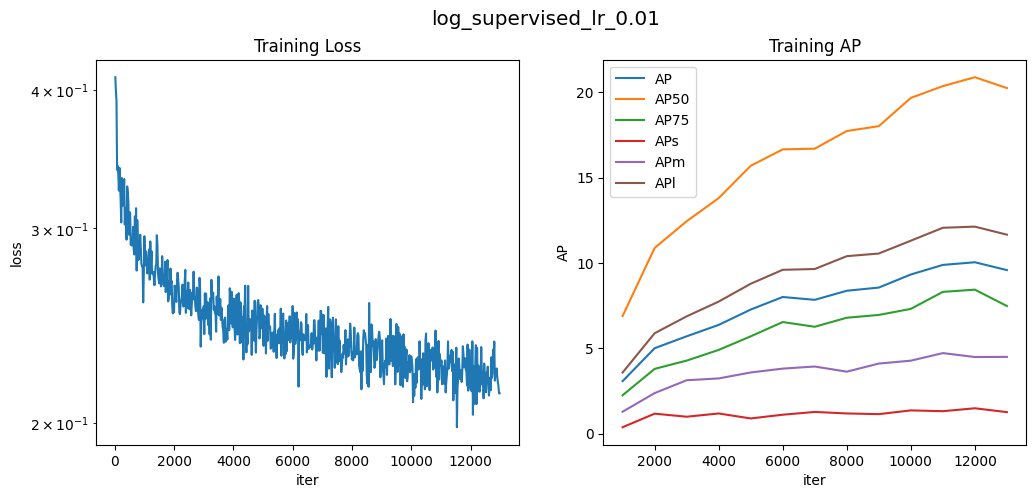

In [103]:
x2, y2, checkpoint2, AP2 = training_plot('./log_supervised_lr_0.01.txt', loss_offset=0)

## Plot Full Supervised Training

Text(0.5, 0.98, 'Complete Supervised Training')

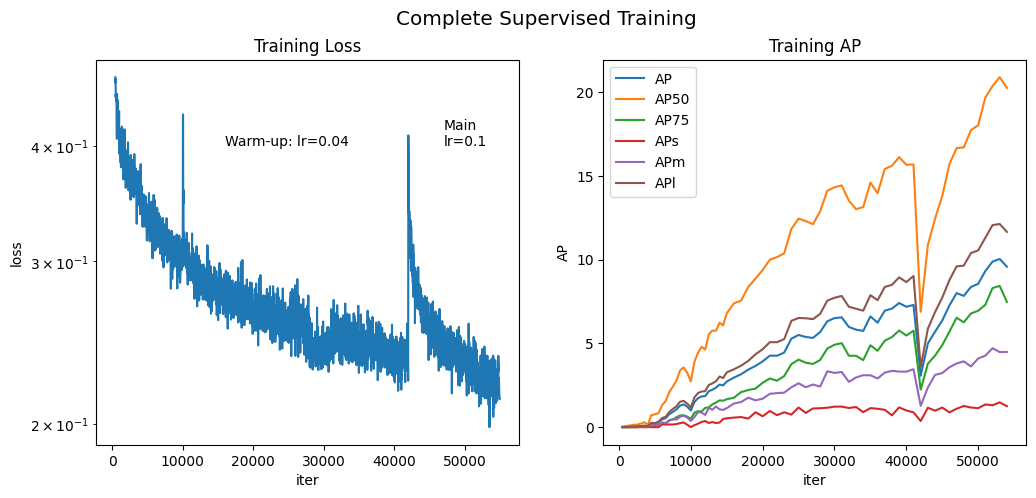

In [104]:
x = np.concatenate((x1, x2 + x1[-1]), axis=0)
y = np.concatenate((y1, y2), axis=0)
checkpoint = np.concatenate((checkpoint1, checkpoint2 + checkpoint1[-1]), axis=0)
AP = np.concatenate((AP1, AP2), axis=1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(x[20:], y[20:])
ax1.set_yscale('log')
ax1.title.set_text("Training Loss")
ax1.set_xlabel('iter')
ax1.set_ylabel('loss')
# ax1.vlines([41999], 0, 0.5, linestyles='dashed', colors='red', linewidth=0.63)
ax1.text(16000, 0.4, "Warm-up: lr=0.04")
ax1.text(47000, 0.4, "Main\nlr=0.1")

ax2.plot(checkpoint, AP[0], label='AP')
ax2.plot(checkpoint, AP[1], label='AP50')
ax2.plot(checkpoint, AP[2], label='AP75')
ax2.plot(checkpoint, AP[3], label='APs')
ax2.plot(checkpoint, AP[4], label='APm')
ax2.plot(checkpoint, AP[5], label='APl')
ax2.legend()
ax2.title.set_text("Training AP")
ax2.set_xlabel('iter')
ax2.set_ylabel('AP')

fig.suptitle('Complete Supervised Training', fontsize="x-large")